In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [19]:
# defining constants
SWEEPS = 20_000 # the amount of times we update the M-H path (should change)
H = 1
M = 1
TAU = 250 # need to change tau 
DELTATAU = 1
NTAU = int(TAU/DELTATAU)
HITSIZE = 0.1 # need to test

# i think these are fine 
XLOW = -4
XHIGH = 4
NXBINS = 100
DELTAX = (XHIGH - XLOW) / NXBINS
HITSIZE = 0.1
prob_histogram = np.zeros(NXBINS)
x_bins = np.linspace(XLOW, XHIGH, NXBINS + 1)

x_path = np.zeros(NTAU)

what tau_b do we need theoretically to arrive at ground state --
and tune delta tau 

beta = 1/(k_b)t  thermal energy 

we want to solve for the maxwells dist. 

want kbt to be significantly less than the ground state energy 


In [20]:
def potential(x):
    return (ALPHA * x ** 4) - (2 * x ** 2) + (1 / ALPHA)

def vary_path(x_current):
    x_prime = x_current + np.random.random() * 2 * HITSIZE - HITSIZE
    while x_prime > XHIGH or x_prime < XLOW:
        x_prime = x_current + np.random.random() * 2 * HITSIZE - HITSIZE
    return x_prime

# here I defined the action based on the lagrangian in the final project. 
def action(x_left, x_right):
    K = 0.5 * M * (((x_right - x_left))**2) / DELTATAU
    V = DELTATAU * potential(((x_left + x_right) / 2))
    return K + V

# action S is the integral of the lagrangian. So that is why this can be K + V instead of K - V 
def total_action(x_path):
    path_action = 0
    for i in range(-1, NXBINS-1):
        path_action += action(x_path[i], x_path[i+1])
    return path_action

def delta_action(x_path, x_prime, i):
    x_left = x_path[i-1]
    x_right = x_path[i+1] if i < NTAU-1 else x_path[0] #PBC.
    daction = action(x_left, x_prime) + action(x_prime, x_right) 
    daction -= action(x_left, x_path[i]) + action(x_path[i], x_right) #compute the resulting change from u in delta S.
    return daction

def MCMC(x_path, prob_histogram): # this follows MH 
    for i in range(NTAU):
        x_prime = vary_path(x_path[i])
        daction = delta_action(x_path, x_prime, i)
        if daction <= 0:            
            x_path[i] = x_prime
        else:        
            prob = np.exp(-daction)
            if np.random.random() < prob:
                x_path[i] = x_prime
    hist, _ = np.histogram(x_path, bins=x_bins)
    prob_histogram += hist

In [21]:
for k in tqdm.tqdm(range(SWEEPS)):
    MCMC(x_path, prob_histogram)

100%|██████████| 20000/20000 [01:22<00:00, 241.68it/s]


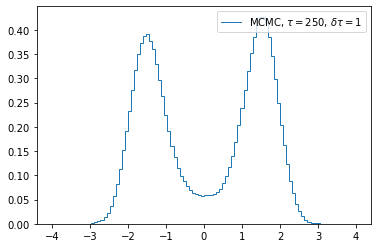

In [22]:
plt.figure()
plt.stairs(prob_histogram/np.sum(prob_histogram*DELTAX), x_bins, label=f"MCMC, $\\tau = {TAU}$, $\\delta\\tau={DELTATAU}$")
plt.legend()
plt.show()